In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)

# Nota total
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

# Nota das provas que não zeraram
nao_zerou = dados.query("NU_NOTA_TOTAL != 0")


Text(0.5, 1.0, 'A - Sem Internet, B - Com Internet')

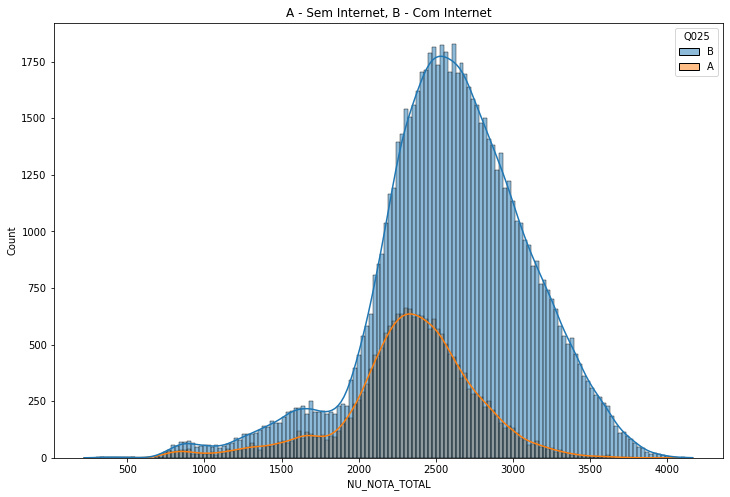

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(nao_zerou, x="NU_NOTA_TOTAL", hue="Q025", kde=True)
plt.title("A - Sem Internet, B - Com Internet")

Text(0.5, 1.0, 'A - Sem Internet, B - Com Internet')

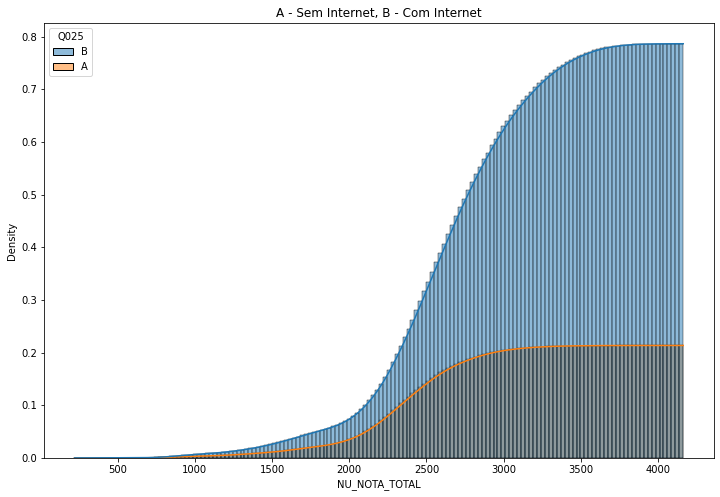

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(nao_zerou, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
plt.title("A - Sem Internet, B - Com Internet")

(-50.0, 1050.0)

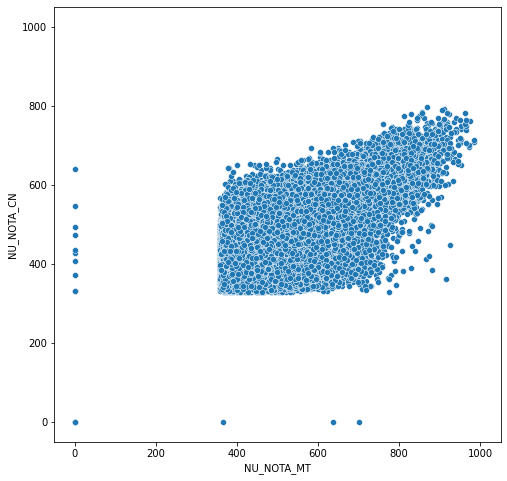

In [16]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=nao_zerou, x="NU_NOTA_MT", y="NU_NOTA_CN")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

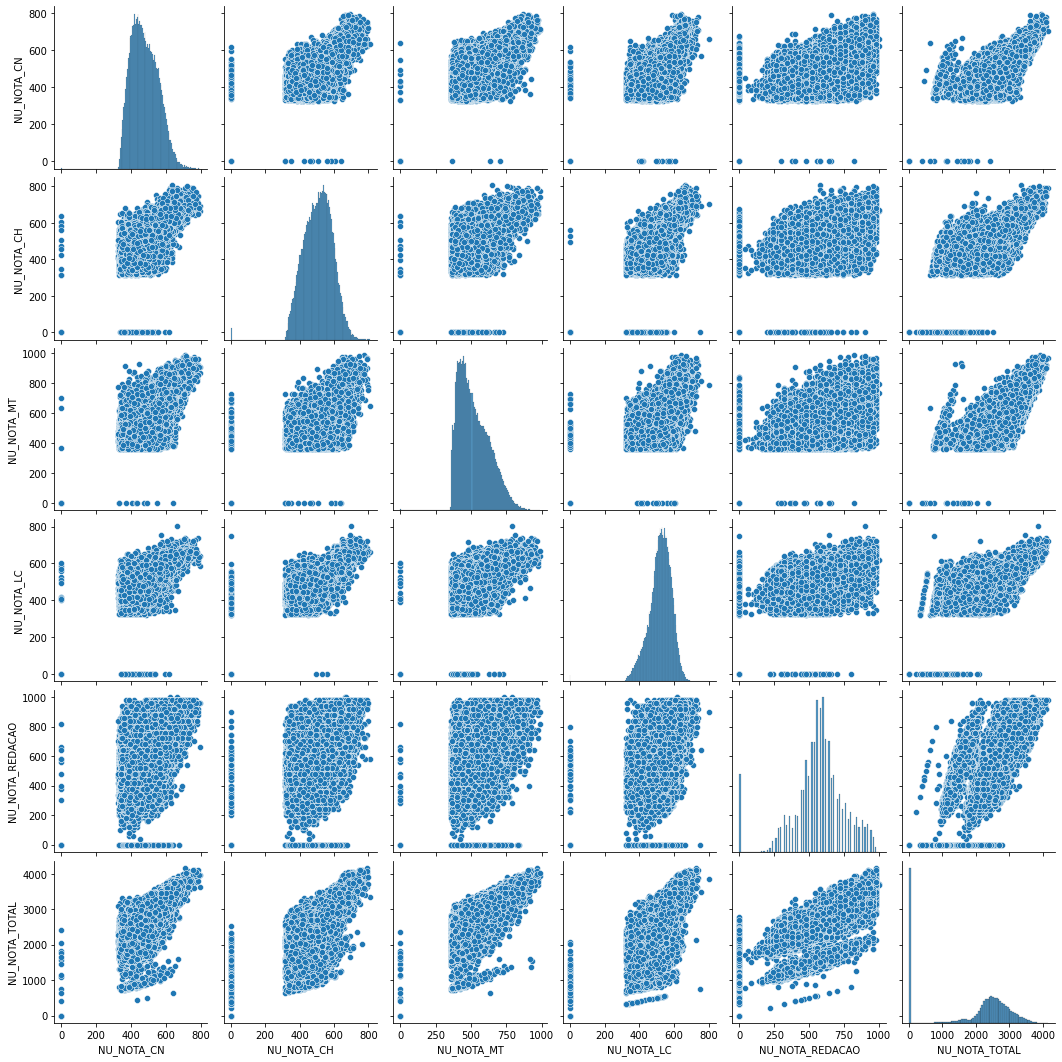

In [17]:
sns.pairplot(dados[provas])

In [18]:
correl = nao_zerou[provas].corr()
correl

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


<AxesSubplot:>

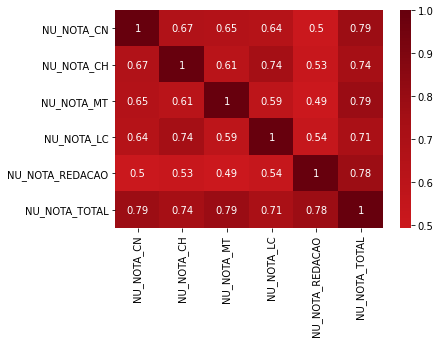

In [20]:
sns.heatmap(correl, cmap="Reds", center=0, annot=True)